In [4]:
import networkx as nx
import string
import osmnx as ox

def generate_streetnetwork(centerpoint, distance):

    """
    Load a network from OSMNX which will be used for the simulation runs. The generated network is from Rotterdam.
    Returns
    -------
    G: network MultiGraph
        Network Graph with different attributes:
            Nodes and Edges with LineString with coordinates,
            Edges have properties Speed, Travel time, Length.

    """
    lonlat=     centerpoint                                 #coordinates of the city centre of Rotterdam
    distance =  distance                                        #distance in meters from the coordinates.
    roadtype=   "drive"                                     #select only roads which are driveable by the car.

    ox.config(use_cache=True, log_console=True)

    # download street network data from OSM and construct a MultiDiGraph model
    #G = ox.graph_from_point(lonlat, dist=distance, network_type=roadtype)
    G = ox.graph_from_point(lonlat, dist=distance, network_type=roadtype)

    return G

In [5]:
def save_graph(centerpoint, distance):
    G=generate_streetnetwork(casa_de_moneda, distance)
    filepath=f"graphs/Graph_MexicoCity_{distance}.graph.graphml"
    # ox.save_graph_geopackage(G, filepath=filepath)
    ox.save_graphml(G,filepath)

In [6]:
casa_de_moneda = (19.428517, -99.16559)
save_graph(casa_de_moneda, 3000)

C:\Users\isvandroffelaa\Anaconda3\envs\ox\lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


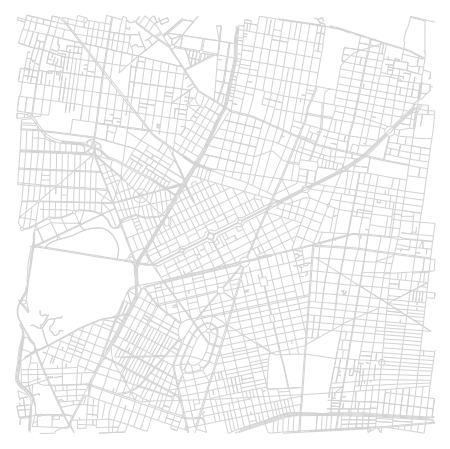

In [17]:
#G=generate_streetnetwork()
filepath="graphs/Graph_MexicoCity.graph.graphml"
G = ox.load_graphml(filepath=filepath)

node_size = []
node_color = []
for node in G.nodes:
    node_size.append(0)
    node_color.append('blue')

fig, ax = ox.plot_graph(
            G, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=1, edge_color='lightgray'
            )

In [18]:
len(G.nodes())

4575

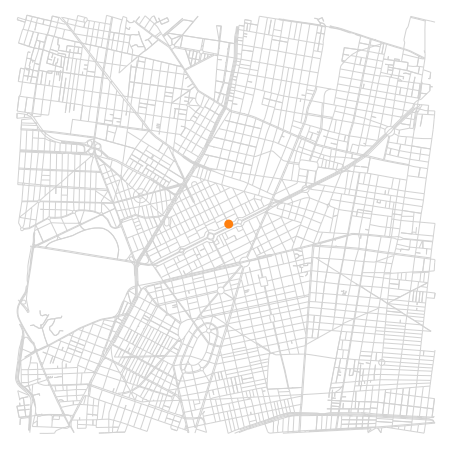

In [64]:
casa_de_moneda_node = ox.distance.nearest_nodes(G=G, Y=casa_de_moneda[0], X=casa_de_moneda[1])

node_size = []
node_color = []
for node in G.nodes:
    if node == casa_de_moneda_node:
        node_size.append(80)
        node_color.append('tab:orange')
    else:
        node_size.append(0)
        node_color.append('blue')
save_filepath = 'graphs/MexicoCityGraph_3km.png'
fig, ax = ox.plot_graph(
    G, bgcolor="white", node_color=node_color, node_size=node_size, edge_linewidth=1, edge_color='lightgray',
    save=True, filepath= save_filepath
            )

In [35]:
ox.distance.nearest_nodes(G=G, Y=19.428517, X=-99.16559, return_dist=True)

(3779331130, 39.79730937668117)

In [27]:
G.edges(data=True)

OutMultiEdgeDataView([(30379463, 7873300698, {'osmid': [98670530, 843994332, 98670501], 'oneway': True, 'lanes': '3', 'name': 'Periférico Boulevard Manuel Ávila Camacho', 'highway': 'trunk', 'maxspeed': '80', 'reversed': False, 'length': 404.0120000000001, 'tunnel': 'yes', 'geometry': <shapely.geometry.linestring.LineString object at 0x00000298C6606890>}), (30379463, 7873061122, {'osmid': 844029487, 'oneway': True, 'lanes': '2', 'name': 'Periférico Boulevard Manuel Ávila Camacho', 'highway': 'secondary', 'reversed': False, 'length': 92.23899999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x00000298C99623E0>}), (30379465, 2507500720, {'osmid': 238039076, 'oneway': True, 'lanes': '4', 'name': 'Periférico Boulevard Manuel Ávila Camacho', 'highway': 'trunk', 'maxspeed': '80', 'reversed': False, 'length': 144.035, 'geometry': <shapely.geometry.linestring.LineString object at 0x00000298C9962800>}), (30379465, 1120149709, {'osmid': 688257037, 'oneway': True, 'name': '

In [41]:
# ox.plot_graph(ox.graph_from_place('Mexico City, Mexico'))

In [ ]:
ox.save_graphml(G, './data/graph_CDMX.graphml')